### Expanding EDA  
* Engineer and transform the features and the target variable
* Set base to Build a model
* Further make and submit predictions

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
%matplotlib inline 
pd.pandas.set_option('display.max_columns', None)
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats



In [2]:
kcfe = pd.read_csv('kc_4_fe3') 
kcfe.head() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,1951.0,98178,47.5112,-122.257,1340,5650,2014,10,13,59,0.0,0.2219
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9,63,40.0,0.5380
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015,2,25,82,0.0,0.1800
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,1987.0,98136,47.5208,-122.393,1360,5000,2014,12,9,49,22.0,0.6040
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,2001.0,98074,47.6168,-122.045,1800,7503,2015,2,18,28,14.0,0.5100


##### Checking percentage of nan values and list of features which has missing value

In [3]:
# checking % of nan value present
# Finding list of features having missing values
features_with_na=[features for features in kcfe.columns if kcfe[features].isnull().sum()>1]
# printing the feature name and missing value
for feature in features_with_na:
    print(feature,np.round(kcfe[feature].isnull().mean(),6), '%missing vales')  #upto 6 decimal place

##### No Null values or missing value detected 

In [4]:
kcfe.dtypes 

id                        int64
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
month                     int64
day                       int64
yr_age_of_house           int64
yr_age_of_renovation    float64
price_in_millions       float64
dtype: object

##### Finding relationship between each column having missing value and sales price

In [5]:
for feature in features_with_na:
    kc1 = kcfe.copy()
    
    #making variable that indicate 1 if the observation was missing or zero otherwise
    kc1[feature] = np.where(kc1[feature].isnull(), 1, 0)
    
    
    #Calculating the mean Sale price where information is missing or present
    kc1.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()
    
    # Each null value will be ploted in 1 on the x axis

In [6]:
kcfe.nunique() 

id                      21420
price                    3622
bedrooms                   12
bathrooms                  29
sqft_living              1034
sqft_lot                 9776
floors                      6
waterfront                  2
view                        5
condition                   5
grade                      11
sqft_above                942
sqft_basement             303
yr_built                  116
yr_renovated              116
zipcode                    70
lat                      5033
long                      751
sqft_living15             777
sqft_lot15               8682
year                        2
month                      12
day                        31
yr_age_of_house           117
yr_age_of_renovation      114
price_in_millions        3622
dtype: int64

##### Confirming all columns as Numerical variables 

In [7]:
#listing all numerical variables
num_features = [feature for feature in kcfe.columns if kcfe[feature].dtypes != 'O']  #'O' is for object
print('Number of numerical variables: ', len(num_features))
#visualising the columns of the data
kcfe[num_features].head() 

Number of numerical variables:  26


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,1951.0,98178,47.5112,-122.257,1340,5650,2014,10,13,59,0.0,0.2219
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9,63,40.0,0.5380
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015,2,25,82,0.0,0.1800
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,1987.0,98136,47.5208,-122.393,1360,5000,2014,12,9,49,22.0,0.6040
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,2001.0,98074,47.6168,-122.045,1800,7503,2015,2,18,28,14.0,0.5100


In [8]:
yr_feature = [feature for feature in num_features if 'yr' in feature or 'year' in feature or 'month' in feature or 'day' in feature] 
yr_feature

['yr_built',
 'yr_renovated',
 'year',
 'month',
 'day',
 'yr_age_of_house',
 'yr_age_of_renovation']

In [9]:
for feature in yr_feature:
    print(feature, kcfe[feature].nunique())     

yr_built 116
yr_renovated 116
year 2
month 12
day 31
yr_age_of_house 117
yr_age_of_renovation 114


In [10]:
kcfe.year.min(), kcfe.year.max()  

(2014, 2015)

In [11]:
kcfe.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
id                      21597 non-null int64
price                   21597 non-null float64
bedrooms                21597 non-null int64
bathrooms               21597 non-null float64
sqft_living             21597 non-null int64
sqft_lot                21597 non-null int64
floors                  21597 non-null float64
waterfront              21597 non-null float64
view                    21597 non-null float64
condition               21597 non-null int64
grade                   21597 non-null int64
sqft_above              21597 non-null int64
sqft_basement           21597 non-null float64
yr_built                21597 non-null int64
yr_renovated            21597 non-null float64
zipcode                 21597 non-null int64
lat                     21597 non-null float64
long                    21597 non-null float64
sqft_living15           21597 non-null int64
sqft_lot15        

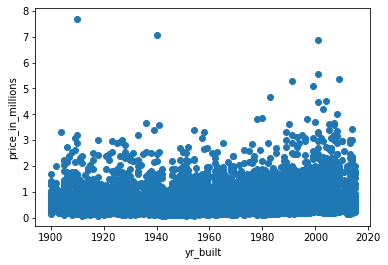

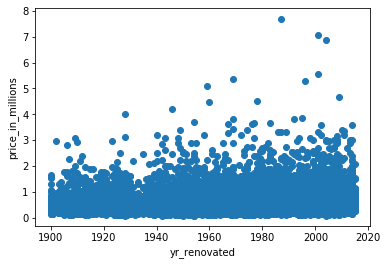

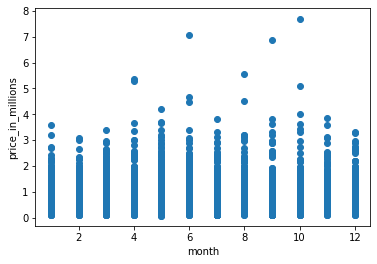

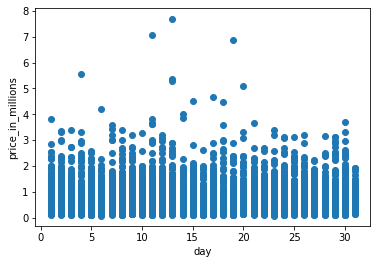

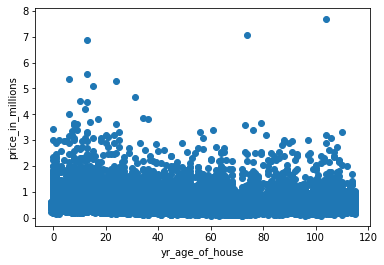

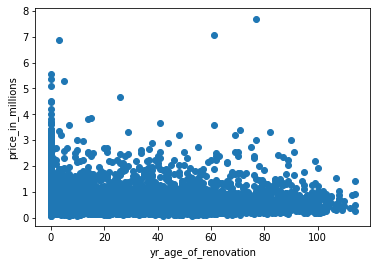

In [12]:
for feature in yr_feature:
    if feature !='year':
        kc1=kcfe.copy()
        plt.scatter(kc1[feature], kc1['price_in_millions']) 
        plt.xlabel(feature)
        plt.ylabel('price_in_millions') 
        plt.show() 

##### Observation : we can see that there are 7 datetime based variables . 
* yr_age_of_house provides us the report that there were more newer houses sold than the older houses


#### Two types of Numerical Variables: Continous & Discreate Variable

In [13]:
discrete_feature = [feature for feature in num_features if len (kcfe[feature].unique())<30 and feature not in yr_feature + ['id']] 

print('Discrete Variable Count: {}'.format(len(discrete_feature))) 

Discrete Variable Count: 7


In [14]:
discrete_feature

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [15]:
kcfe[discrete_feature].head() 

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,3,1.00,1.0,0.0,0.0,3,7
1,3,2.25,2.0,0.0,0.0,3,7
2,2,1.00,1.0,0.0,0.0,3,6
3,4,3.00,1.0,0.0,0.0,5,7
4,3,2.00,1.0,0.0,0.0,3,8


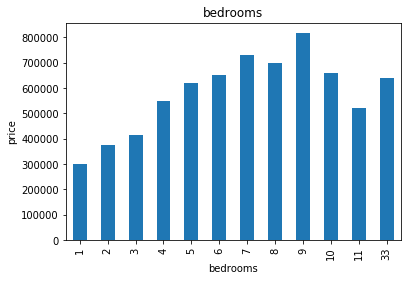

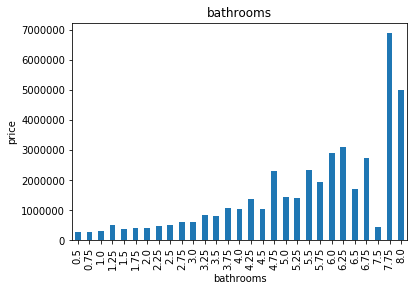

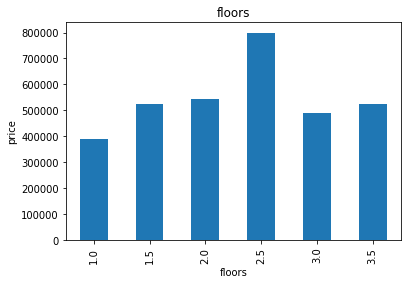

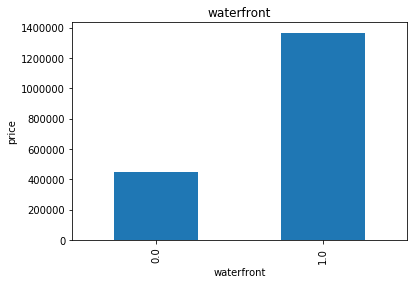

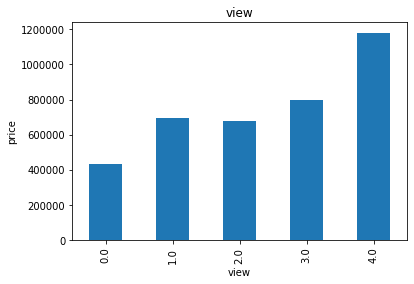

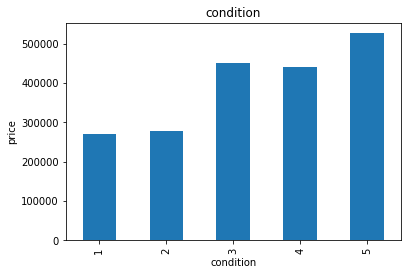

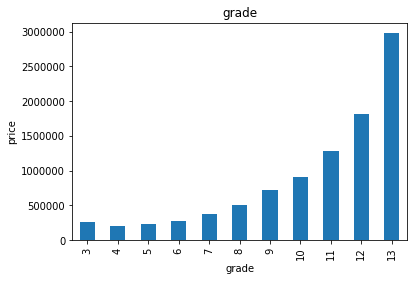

In [16]:
for feature in discrete_feature:
    kc1 = kcfe.copy() 
    kc1.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show() 

In [17]:
continuous_feature = [feature for feature in num_features if feature not in yr_feature + discrete_feature + ['id']] 
print('Continuous Variable Count: {}'.format(len(continuous_feature))) 

Continuous Variable Count: 11


In [18]:
continuous_feature

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_in_millions']

#####  Finding distribution of continous feature / variable with histogram

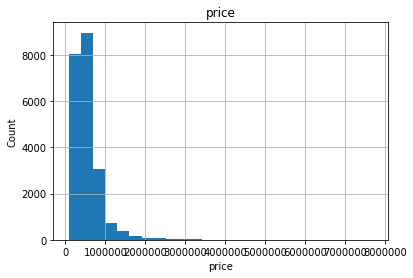

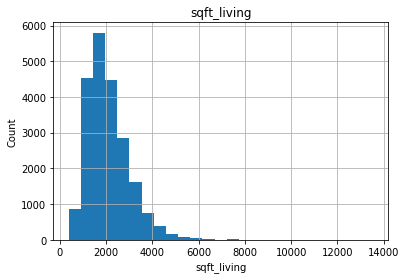

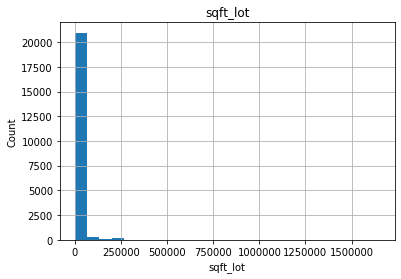

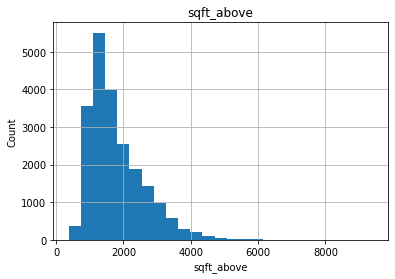

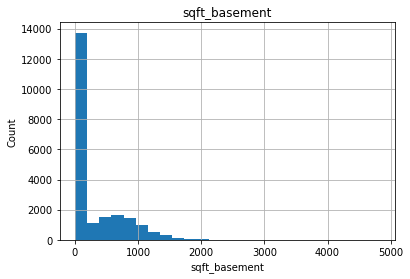

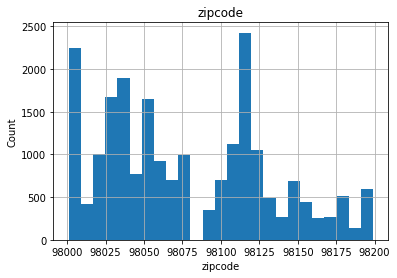

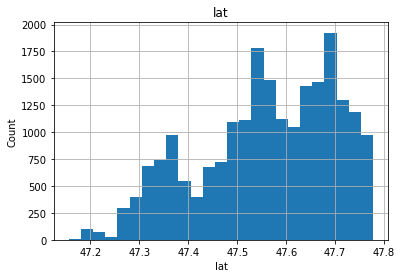

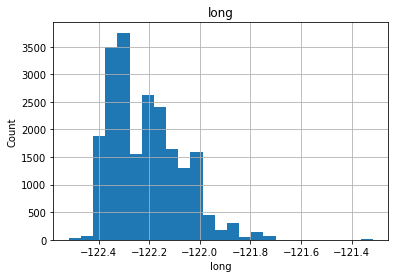

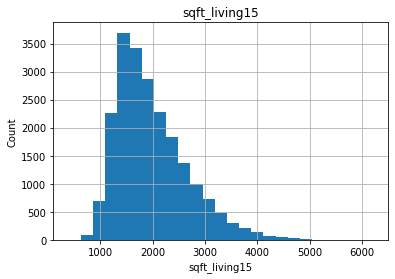

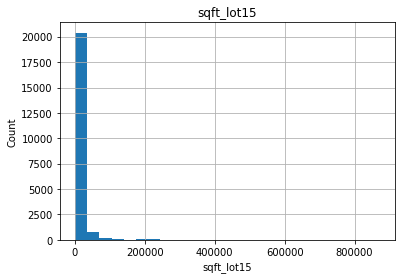

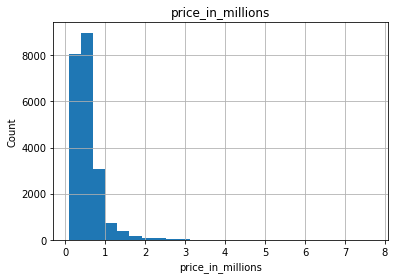

In [19]:
for feature in continuous_feature:
    kc1=kcfe.copy()
    kc1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

###  Logarithmic transformation 
* Applying log normal distribution for dependent(price_in_millions) and independent(others) feature to check the relationship

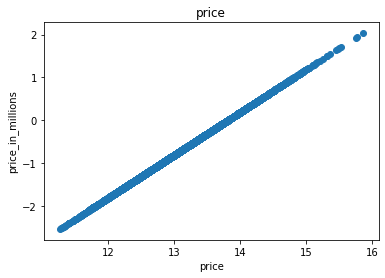

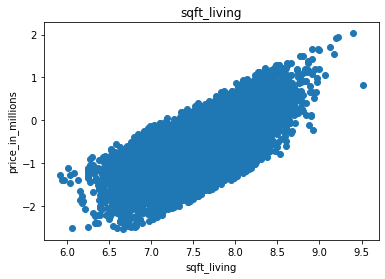

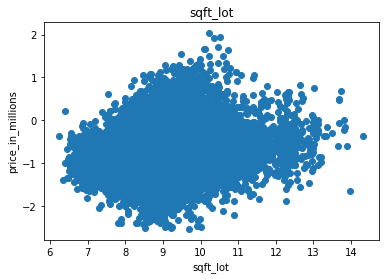

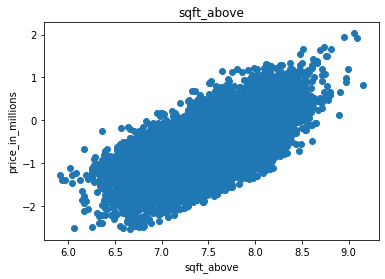

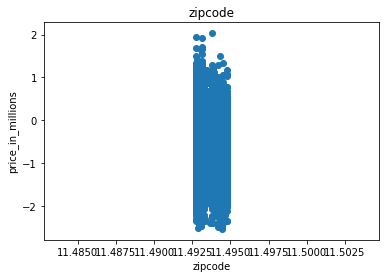

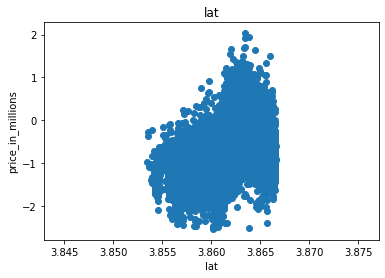

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


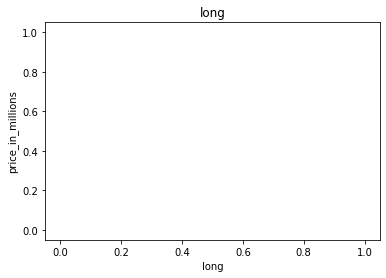

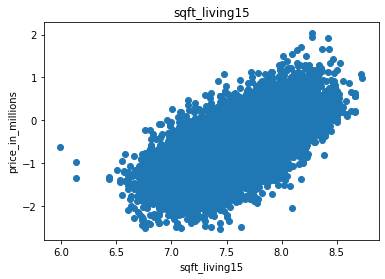

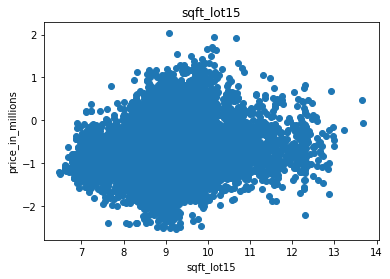

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


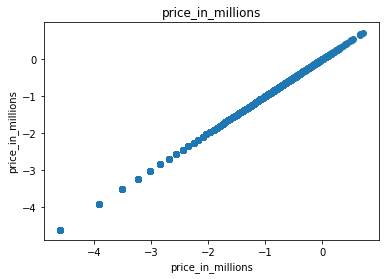

In [20]:
for feature in continuous_feature:
    kc1=kcfe.copy()
    if 0 in kc1[feature].unique():
        pass
    else:
        kc1[feature]=np.log(kc1[feature])
        kc1['price_in_millions'] = np.log(kc1['price_in_millions'])
        plt.scatter(kc1[feature], kc1['price_in_millions'])
        plt.xlabel(feature)
        plt.ylabel('price_in_millions') 
        plt.title(feature)
        plt.show() 


#### Observation: here we can see that there is a strong & positive monotonic relationship between the price_in_millions and other features like sqft_living , sqft_above &  sqft_living15 

##### Checking the Outliers in the features using Box Plot

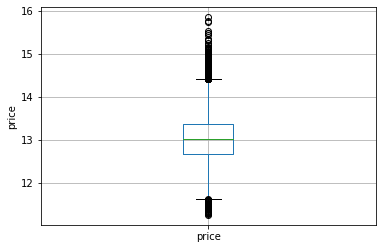

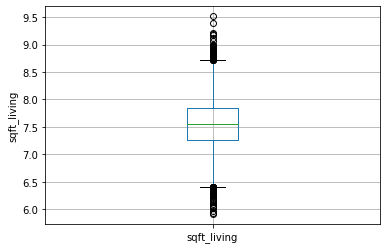

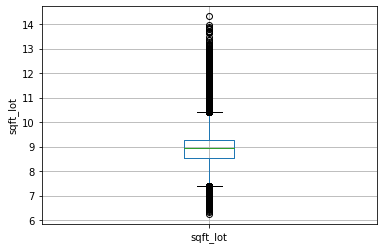

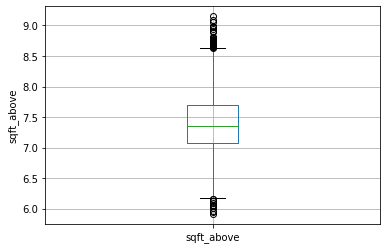

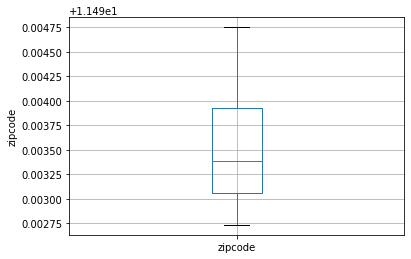

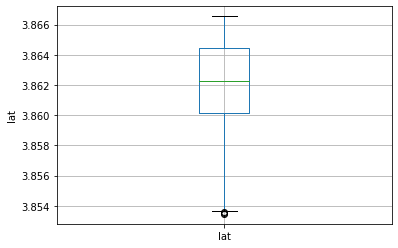

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


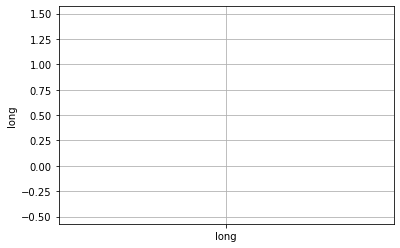

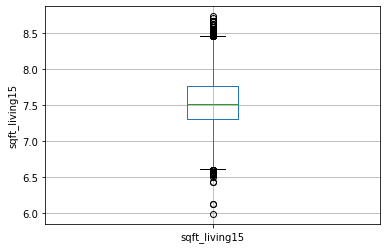

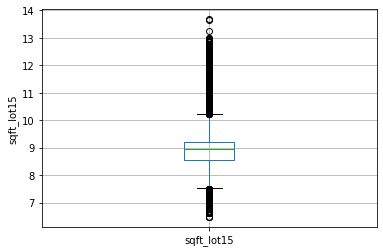

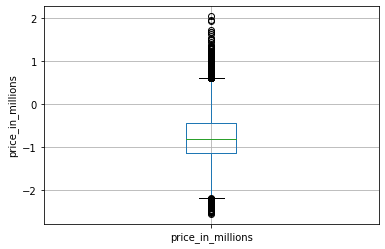

In [21]:
for feature in continuous_feature:
    kc1=kcfe.copy()
    if 0 in kc1[feature].unique():
        pass
    else:
        kc1[feature]=np.log(kc1[feature])
        kc1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()      
    

#### Observation 
* Since there are a number of outliers for the said features it will be advisable to use median

##### Locating outliers

In [22]:
kc1.loc[kc1['price'] > 6000000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449,2014,6,11,74,61.0,1.954445
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800,2014,10,13,104,77.0,2.041220
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,2004.0,98039,47.6305,-122.240,4540,42730,2014,9,19,13,3.0,1.930071


In [23]:
kc1.loc[kc1['bedrooms'] > 20]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,1972.0,98103,47.6878,-122.331,1330,4700,2014,6,25,67,25.0,-0.446287


##### Dropping Outliers

In [24]:
kc1 = kc1[kc1.bedrooms != 33]
kc1 = kc1[kc1.price < 6000000]

#### checking Histograms pre feature engineering

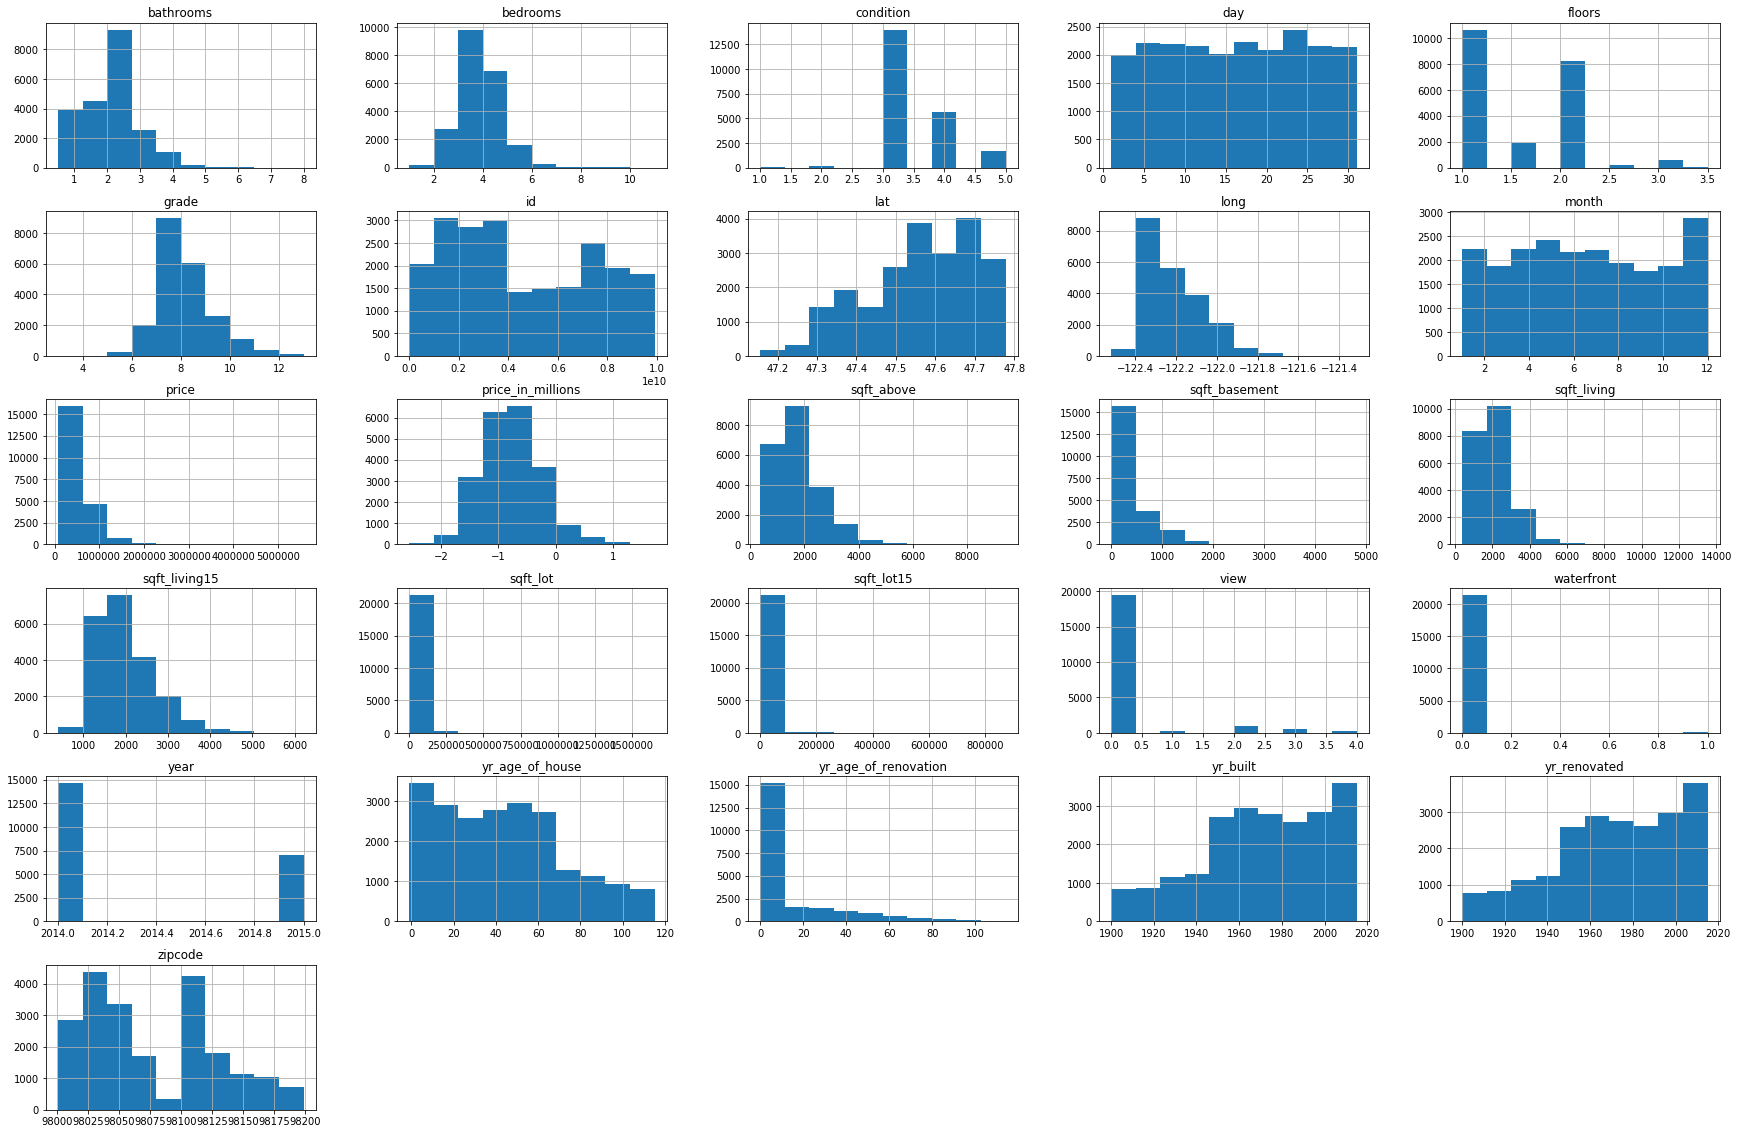

In [28]:
kc1.hist(figsize=(30,20))
plt.show()

In [29]:
# For checking nan values  
features_nan = [feature for feature in kcfe.columns if kcfe[feature].isnull().sum()>1 and kcfe[feature].dtypes == 'O'] 

for feature in features_nan:
    print("{}:{}% missing values".format(feature,np.round(kcfe[feature].isnull().mean(),2))) ## upto two decimal place

In [30]:
## to replace missing values

def replace_cat_feature(kcfe,features_nan):
    kcfe1=kcfe.copy()
    kcfe1[features_nan]=kcfe1[features_nan].fillna('missing')
    return kcfe1
kcfe=replace_cat_feature(kcfe,features_nan)
kcfe[features_nan].isnull().sum() 

Series([], dtype: float64)

In [31]:
# For checking nan values  
num_nan = [feature for feature in kcfe.columns if kcfe[feature].isnull().sum()>1 and kcfe[feature].dtypes != 'O'] 

for feature in num_nan:
    print("{}:{}% missing values".format(feature,np.round(kcfe[feature].isnull().mean(),2))) ## upto two decimal place

In [32]:
## replacing numerical missing value
for feature in num_nan:
    ## replacing using median to take care of outliers
    median_value=kcfe[feature].median() 
    ## creating a new feature to capture nan values
    kcfe[feature+'nan']=np.where(kcfe[feature].isnull(),1,0)
    kcfe[feature].fillna(median_value,inplace=True)
kcfe[num_nan].isnull().sum() 

Series([], dtype: float64)

In [33]:
kcfe.isnull().sum() 

id                      0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated            0
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
year                    0
month                   0
day                     0
yr_age_of_house         0
yr_age_of_renovation    0
price_in_millions       0
dtype: int64

In [34]:
kcfe.head(2) 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,1951.0,98178,47.5112,-122.257,1340,5650,2014,10,13,59,0.0,0.2219
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9,63,40.0,0.5380


In [35]:
kcfe[yr_feature].head(2) 

,yr_built,yr_renovated,year,month,day,yr_age_of_house,yr_age_of_renovation
0,1955,1951.0,2014,10,13,59,0.0
1,1951,1991.0,2014,12,9,63,40.0


In [36]:
kcfe[['yr_built','yr_age_of_house','year','month','day','yr_renovated','yr_age_of_renovation']].head(2)  

,yr_built,yr_age_of_house,year,month,day,yr_renovated,yr_age_of_renovation
0,1955,59,2014,10,13,1951.0,0.0
1,1951,63,2014,12,9,1991.0,40.0


In [37]:
kcfe[num_features].head() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,1951.0,98178,47.5112,-122.257,1340,5650,2014,10,13,59,0.0,0.2219
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9,63,40.0,0.5380
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015,2,25,82,0.0,0.1800
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,1987.0,98136,47.5208,-122.393,1360,5000,2014,12,9,49,22.0,0.6040
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,2001.0,98074,47.6168,-122.045,1800,7503,2015,2,18,28,14.0,0.5100


In [38]:
num_features1 = ['sqft_lot','sqft_living15','sqft_lot15', 'sqft_living', 'sqft_above', 'price']
for feature in num_features1:
    kcfe[feature]=np.log(kcfe[feature]) 


#### sqft_basement is not considered above as it has zero as value in it

In [39]:
kcfe.head() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,12.309982,3,1.00,7.073270,8.639411,1.0,0.0,0.0,3,7,7.073270,0.0,1955,1951.0,98178,47.5112,-122.257,7.200425,8.639411,2014,10,13,59,0.0,0.2219
1,6414100192,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,7,7.682482,400.0,1951,1991.0,98125,47.7210,-122.319,7.432484,8.941022,2014,12,9,63,40.0,0.5380
2,5631500400,12.100712,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,6,6.646391,0.0,1933,1933.0,98028,47.7379,-122.233,7.908387,8.994917,2015,2,25,82,0.0,0.1800
3,2487200875,13.311329,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,7,6.956545,910.0,1965,1987.0,98136,47.5208,-122.393,7.215240,8.517193,2014,12,9,49,22.0,0.6040
4,1954400510,13.142166,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,8,7.426549,0.0,1987,2001.0,98074,47.6168,-122.045,7.495542,8.923058,2015,2,18,28,14.0,0.5100


In [40]:
kcfe.head(100) 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,12.309982,3,1.00,7.073270,8.639411,1.0,0.0,0.0,3,7,7.073270,0.0,1955,1951.0,98178,47.5112,-122.257,7.200425,8.639411,2014,10,13,59,0.0,0.2219
1,6414100192,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,7,7.682482,400.0,1951,1991.0,98125,47.7210,-122.319,7.432484,8.941022,2014,12,9,63,40.0,0.5380
2,5631500400,12.100712,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,6,6.646391,0.0,1933,1933.0,98028,47.7379,-122.233,7.908387,8.994917,2015,2,25,82,0.0,0.1800
3,2487200875,13.311329,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,7,6.956545,910.0,1965,1987.0,98136,47.5208,-122.393,7.215240,8.517193,2014,12,9,49,22.0,0.6040
4,1954400510,13.142166,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,8,7.426549,0.0,1987,2001.0,98074,47.6168,-122.045,7.495542,8.923058,2015,2,18,28,14.0,0.5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,13.715690,4,2.50,8.101678,9.235033,1.0,0.0,0.0,3,7,7.779049,910.0,1946,1991.0,98040,47.5873,-122.249,7.575585,8.706987,2014,9,8,68,45.0,0.9050
96,3422049190,12.419166,3,1.75,7.580700,9.660205,1.0,0.0,0.0,3,7,7.580700,0.0,1967,1975.0,98032,47.3576,-122.277,7.467371,9.656051,2015,3,30,48,8.0,0.2475
97,1099611230,12.201060,4,1.50,7.056175,8.764053,1.0,0.0,0.0,4,7,7.056175,0.0,1975,1980.0,98023,47.3036,-122.378,7.056175,8.764053,2014,9,12,39,5.0,0.1990
98,722079104,12.657148,3,1.75,7.501082,10.640652,1.0,0.0,0.0,5,7,7.098376,600.0,1980,1992.0,98038,47.4109,-121.958,7.408531,11.813297,2014,7,11,34,12.0,0.3140


#### Feature Scaling

In [41]:
feature_scale = [feature for feature in kcfe.columns if feature not in ['id','price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(kcfe[feature_scale]) 

MinMaxScaler(copy=True, feature_range=(0, 1))

##### Transforming the train and test set, and add on the id and price variables

In [42]:
scaler.transform(kcfe[feature_scale]) # checking values in array 

array([[0.0625    , 0.06666667, 0.32216632, ..., 0.51724138, 0.        ,
        0.01887956],
       [0.0625    , 0.23333333, 0.53839214, ..., 0.55172414, 0.35087719,
        0.06035161],
       [0.03125   , 0.06666667, 0.20358549, ..., 0.71551724, 0.        ,
        0.01338231],
       ...,
       [0.03125   , 0.03333333, 0.2816897 , ..., 0.05172414, 0.        ,
        0.04252178],
       [0.0625    , 0.26666667, 0.40674899, ..., 0.10344828, 0.03508772,
        0.04224613],
       [0.03125   , 0.03333333, 0.2816897 , ..., 0.06034483, 0.        ,
        0.03240619]])

In [43]:
# The above array to be converted into DataFrame

In [44]:
kcfe1 = pd.concat([kcfe[['id','price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(kcfe[feature_scale]),columns=feature_scale)],
                   axis=1)

#### Checking dataframe after applying feature scaling

In [45]:
kcfe1.head() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
0,7129300520,12.309982,0.06250,0.066667,0.322166,0.295858,0.0,0.0,0.0,0.5,0.4,0.358392,0.000000,0.478261,0.443478,0.893939,0.571498,0.217608,0.441342,0.300162,0.0,0.818182,0.400000,0.517241,0.000000,0.018880
1,6414100192,13.195614,0.06250,0.233333,0.538392,0.326644,0.4,0.0,0.0,0.5,0.4,0.546652,0.082988,0.443478,0.791304,0.626263,0.908959,0.166113,0.525882,0.342058,0.0,1.000000,0.266667,0.551724,0.350877,0.060352
2,5631500400,12.100712,0.03125,0.066667,0.203585,0.366664,0.0,0.0,0.0,0.5,0.3,0.226478,0.000000,0.286957,0.286957,0.136364,0.936143,0.237542,0.699256,0.349544,1.0,0.090909,0.800000,0.715517,0.000000,0.013382
3,2487200875,13.311329,0.09375,0.333333,0.463123,0.280700,0.0,0.0,0.0,1.0,0.4,0.322322,0.188797,0.565217,0.756522,0.681818,0.586939,0.104651,0.446739,0.283185,0.0,1.000000,0.266667,0.431034,0.192982,0.069011
4,1954400510,13.142166,0.06250,0.200000,0.420302,0.340224,0.0,0.0,0.0,0.5,0.5,0.467563,0.000000,0.756522,0.878261,0.368687,0.741354,0.393688,0.548854,0.339562,1.0,0.090909,0.566667,0.250000,0.122807,0.056678


In [46]:
kcfe1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
id                      21597 non-null int64
price                   21597 non-null float64
bedrooms                21597 non-null float64
bathrooms               21597 non-null float64
sqft_living             21597 non-null float64
sqft_lot                21597 non-null float64
floors                  21597 non-null float64
waterfront              21597 non-null float64
view                    21597 non-null float64
condition               21597 non-null float64
grade                   21597 non-null float64
sqft_above              21597 non-null float64
sqft_basement           21597 non-null float64
yr_built                21597 non-null float64
yr_renovated            21597 non-null float64
zipcode                 21597 non-null float64
lat                     21597 non-null float64
long                    21597 non-null float64
sqft_living15           21597 non-null float64


In [47]:
kcfe1.to_csv('kc_4_LR',index=False)  

#### Multicollinearity : 
*  using heat map for checking multicolinearity between variables

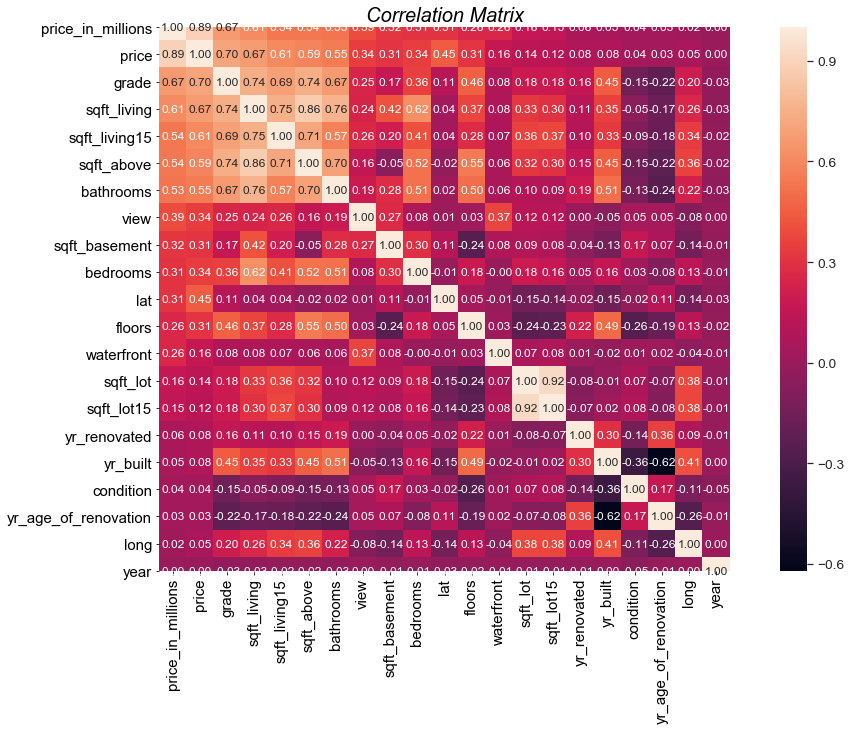

In [48]:
corrmat = kcfe1.corr()
cols = corrmat.nlargest(21, 'price_in_millions')['price_in_millions'].index #specify number of columns to display i.e 21
f, ax = plt.subplots(figsize=(18, 10)) #size of matrix
cm = np.corrcoef(kcfe1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0, size=15)
plt.xticks(rotation=90, size=15)
plt.title("Correlation Matrix",style='oblique', size= 20)

plt.show()

In [83]:
abs(corr)>0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Observation:
* It looks like there's a high multicolinearity between 
- sqft_living & sqft_above 
 

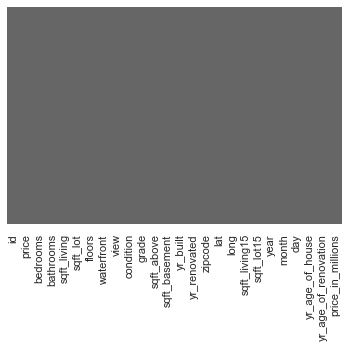

In [85]:
sns.heatmap(kcfe1.isnull(),yticklabels=False,cbar=False,cmap='Accent_r') # confirming zero null values

#### Splitting train & test 

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(kcfe,kcfe['price'],test_size=0.2,random_state=0)

X_train.shape, X_test.shape

((17277, 26), (4320, 26))

In [51]:
X_train

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
3930,1269200229,14.137594,3,3.25,8.239065,10.546341,1.0,1.0,4.0,3,9,7.567346,1852.0,1978,2006.0,98070,47.3907,-122.448,7.955074,10.415143,2014,7,23,36,28.0,1.38000
8267,3883800011,11.314475,3,1.00,6.756932,9.252058,1.0,0.0,0.0,3,6,6.756932,0.0,1954,1954.0,98146,47.4987,-122.341,7.038784,9.328123,2014,11,5,60,0.0,0.08200
15607,2019200480,12.301383,3,2.25,7.293018,8.925055,1.0,0.0,0.0,3,7,7.056175,310.0,1985,1928.0,98003,47.2725,-122.300,7.450080,9.024011,2014,8,13,29,0.0,0.22000
6680,6413100122,12.821123,3,1.75,7.402452,8.488794,1.0,0.0,0.0,3,8,7.090077,440.0,1965,1995.0,98125,47.7125,-122.320,7.299797,8.881836,2014,7,11,49,30.0,0.36995
6999,6738700275,13.676248,4,2.75,7.951559,8.294050,1.5,0.0,0.0,5,8,7.580700,880.0,1912,1984.0,98144,47.5846,-122.291,7.919356,8.294050,2014,6,25,102,72.0,0.87000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2591010040,13.056224,2,1.75,7.130899,8.857800,1.0,0.0,0.0,4,7,7.130899,0.0,1986,1981.0,98033,47.6936,-122.186,7.426549,9.044286,2014,11,10,28,0.0,0.46800
19648,9188200505,12.524526,4,2.50,7.512071,8.260493,2.0,0.0,0.0,3,7,7.512071,0.0,2007,2007.0,98118,47.5186,-122.276,7.753624,8.260493,2014,7,10,7,0.0,0.27500
9845,121039083,13.351887,3,1.75,7.286192,9.422787,2.0,1.0,4.0,4,8,7.021084,340.0,1970,2000.0,98023,47.3311,-122.375,7.585789,9.846547,2015,2,6,45,30.0,0.62900
10799,1453602065,13.000196,3,1.00,7.021084,9.011889,1.0,0.0,0.0,4,7,7.021084,0.0,1938,1938.0,98125,47.7254,-122.290,7.506592,8.882531,2015,2,5,77,0.0,0.44250


In [52]:
X_test

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_age_of_house,yr_age_of_renovation,price_in_millions
156,6388930390,13.384728,5,3.50,8.283999,10.136383,2.0,0.0,0.0,3,9,7.824046,1460.0,1996,1967.0,98056,47.5250,-122.172,7.878534,9.523325,2014,11,20,18,0.0,0.65000
15572,2128000050,13.345507,4,2.25,7.635304,8.881836,1.0,0.0,0.0,5,8,7.237059,680.0,1977,1990.0,98033,47.6970,-122.169,7.654443,9.035987,2014,8,15,37,13.0,0.62500
2080,4401200350,13.620104,3,2.50,8.035926,8.950014,2.0,0.0,0.0,3,10,8.035926,0.0,1999,1975.0,98052,47.6868,-122.108,8.051978,9.058587,2015,2,10,16,0.0,0.82250
17522,3356402232,12.100156,3,1.75,7.114769,9.392662,1.0,0.0,0.0,3,6,7.114769,0.0,1970,2003.0,98001,47.2878,-122.251,7.346010,9.392662,2014,9,24,44,33.0,0.17990
8360,2212600100,12.821258,4,2.75,8.055158,11.120150,1.0,0.0,0.0,4,9,7.718685,900.0,1965,1954.0,98092,47.3382,-122.196,7.700748,10.385636,2014,5,22,49,0.0,0.37000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16922,1761600050,12.891692,3,2.00,7.003065,9.123147,1.0,0.0,0.0,4,7,7.003065,0.0,1969,1994.0,98034,47.7304,-122.231,7.319865,9.047821,2014,12,31,45,25.0,0.39700
12225,3575200030,13.215854,4,2.25,7.791523,10.998761,1.0,0.0,0.0,4,8,7.207860,1070.0,1985,1929.0,98074,47.6206,-122.056,7.677864,9.775541,2014,7,29,29,0.0,0.54900
10452,936000055,13.160622,3,3.00,7.779049,9.875808,1.5,0.0,0.0,3,8,7.779049,0.0,2008,1977.0,98166,47.4545,-122.336,7.339538,10.202814,2014,11,19,6,0.0,0.51950
12354,587550340,13.311329,3,2.50,8.083329,10.408828,2.0,0.0,2.0,3,10,8.083329,0.0,1995,1986.0,98023,47.3256,-122.378,8.306472,10.125310,2014,5,2,19,0.0,0.60400


#### Feature Selection 

In [53]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

#### Making price as dependent variable on y_train as dropping it from X_train

In [54]:
y_train=kcfe1[['price']] 

In [55]:
X_train = kcfe1.drop(['price'],axis=1) 

In [56]:
# X_test = kcfe1.drop(['price'],axis=1) 

##### Setting alpha at 0.0005 for shortlisting features to focus

In [57]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.0005,random_state=0)) 
feature_sel_model.fit(X_train,y_train) 

SelectFromModel(estimator=Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [58]:
feature_sel_model.get_support() 

array([False, False, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True])

In [59]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_train.shape[1]))) 
print('selected_features: {}'.format(len(selected_feat))) 
print('features with coefficient reduced to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0))) 

total features: 25
selected_features: 16
features with coefficient reduced to zero: 8


In [60]:
selected_feat 

Index(['sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'year',
       'day', 'yr_age_of_house', 'yr_age_of_renovation', 'price_in_millions'],
      dtype='object')

#### Continuing the process for test data to confirm 

In [61]:
y_test=kcfe1[['price']] 

In [62]:
X_test = kcfe1.drop(['price'],axis=1) 

In [63]:
# X_test = kcfe1.drop(['price'],axis=1) 

In [64]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.0005,random_state=0)) 
feature_sel_model.fit(X_test,y_test) 

SelectFromModel(estimator=Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [65]:
feature_sel_model.get_support() 

array([False, False, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True])

In [66]:
selected_feat = X_test.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_test.shape[1]))) 
print('selected_features: {}'.format(len(selected_feat))) 
print('features with coefficient reduced to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0))) 

total features: 25
selected_features: 16
features with coefficient reduced to zero: 8


In [67]:
selected_feat 

Index(['sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'year',
       'day', 'yr_age_of_house', 'yr_age_of_renovation', 'price_in_millions'],
      dtype='object')

##### Setting alpha at 0.02 for shortlisting features to focus

In [68]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.02,random_state=0)) 
feature_sel_model.fit(X_train,y_train) 

SelectFromModel(estimator=Lasso(alpha=0.02, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [69]:
feature_sel_model.get_support() 

array([False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False])

In [70]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_train.shape[1]))) 
print('selected_features: {}'.format(len(selected_feat))) 
print('features with coefficient reduced to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0))) 

total features: 25
selected_features: 4
features with coefficient reduced to zero: 20


In [71]:
selected_feat 

Index(['sqft_living', 'view', 'grade', 'lat'], dtype='object')

#### Continuing the process for test data to confirm 

In [72]:
y_test=kcfe1[['price']] 

In [73]:
X_test = kcfe1.drop(['price'],axis=1) 

In [74]:
# X_test = kcfe1.drop(['price'],axis=1) 

In [75]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.02,random_state=0)) 
feature_sel_model.fit(X_test,y_test) 

SelectFromModel(estimator=Lasso(alpha=0.02, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [76]:
feature_sel_model.get_support() 

array([False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False])

In [77]:
selected_feat = X_test.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_test.shape[1]))) 
print('selected_features: {}'.format(len(selected_feat))) 
print('features with coefficient reduced to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0))) 

total features: 25
selected_features: 4
features with coefficient reduced to zero: 20


In [78]:
selected_feat 

Index(['sqft_living', 'view', 'grade', 'lat'], dtype='object')

In [87]:
X_train.to_csv('kc_train.csv',index=False)
X_test.to_csv('kc_test.csv',index=False)  